<a href="https://colab.research.google.com/github/Giocrisrai/Inteligencia_artificial_proyecto_master/blob/main/analisis_de_datos_proyecto_croco_inteligencia_artificial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploración de los datos provenientes del modelo CROCO-OCEAN proveniente de las Islas Clarence al sur de Chile

## Se procede a instalar el paquete que permite leer los archivos netCDF4 

In [ ]:
!pip install netCDF4

instalación de paquete que permite leer datos geograficos

In [ ]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
  Using cached https://github.com/matplotlib/basemap/archive/master.zip
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp36-cp36m-linux_x86_64.whl size=121757483 sha256=d6a7d7e5aaca2673fcbbc2c89e726ea2f84407df3d0db54f0e564b9eee340ec2
  Stored in directory: /tmp/pip-ephem-wheel-cache-m7ume4jy/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap


In [ ]:
!pip install pyproj==1.9.6

## Se procede a importar las principales librerias para el manejo de los datos

In [ ]:
import os
import datetime

import numpy as np
import pandas as pd

from mpl_toolkits.basemap import Basemap, shiftgrid, cm

import warnings
warnings.filterwarnings('ignore')
import datetime
import h5py
import netCDF4 as nc
from netCDF4 import num2date, date2num, date2index


import matplotlib.pyplot as plt
%matplotlib inline

### Para trabajar en google colab y montar en el drive es necesario habilitar el uso de las librerias de Drive para el uso de google colab

In [ ]:
from google.colab import drive
drive.mount ('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


### Funciones 

Permite ver las dimensiones del dataset en formato nc

In [ ]:
def dimensiones(data):
  for dim in data.dimensions.values():
    print(dim)

Permite visualizar los valores de las variables del dataset en formato nc

In [ ]:
def variab (data):
  for var in data.variables.values():
    print(var)

## Manejo de los dataset con los cuales se va a trabajar

Campaña de verano

In [ ]:
modeType   = 'r'
fileFormat = 'NETCDF4'

In [ ]:
url = '/content/gdrive/MyDrive/Colab Notebooks/croco_his3feb_mar.nc4'
ds = nc.Dataset(url, mode=modeType, format=fileFormat)
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    type: ROMS history file
    title: BENGUELA TEST MODEL ZOOM LEVEL #4
    date: 
    rst_file: /media/usuario/DATA/croco/rclarence/salidasi/croco_rst3.nc.4
    his_file: /media/usuario/DATA/croco/rclarence/salidasi/croco_his3.nc.4
    avg_file: /media/usuario/DATA/croco/rclarence/salidasi/croco_avg3.nc.4
    grd_file: /media/usuario/DATA/croco/rclarence/entradasi/croco_grd.nc.4
    ini_file: /media/usuario/DATA/croco/rclarence/entradasi/croco_ini.nc.4
    frc_file: /media/usuario/DATA/croco/rclarence/entradasi/croco_frc.nc.4
    VertCoordType: NEW
    skpp: 2005
    theta_s: 6.0
    theta_s_expl: S-coordinate surface control parameter
    theta_b: 0.0
    theta_b_expl: S-coordinate bottom control parameter
    Tcline: 70.0
    Tcline_expl: S-coordinate surface/bottom layer width
    Tcline_units: meter
    hc: 70.0
    hc_expl: S-coordinate parameter, critical depth
    hc_units: me

In [ ]:
dimensiones(ds)

<class 'netCDF4._netCDF4.Dimension'>: name = 'xi_rho', size = 182
<class 'netCDF4._netCDF4.Dimension'>: name = 'xi_u', size = 181
<class 'netCDF4._netCDF4.Dimension'>: name = 'eta_rho', size = 311
<class 'netCDF4._netCDF4.Dimension'>: name = 'eta_v', size = 310
<class 'netCDF4._netCDF4.Dimension'>: name = 's_rho', size = 30
<class 'netCDF4._netCDF4.Dimension'>: name = 's_w', size = 31
<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 1023
<class 'netCDF4._netCDF4.Dimension'>: name = 'auxil', size = 4


In [ ]:
variab(ds)

<class 'netCDF4._netCDF4.Variable'>
|S1 spherical()
    long_name: grid type logical switch
    option_T: spherical
    option_F: cartesian
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of   used
<class 'netCDF4._netCDF4.Variable'>
float32 xl()
    long_name: domain length in the XI-direction
    units: meter
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 el()
    long_name: domain length in the ETA-direction
    units: meter
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 xi_rho(xi_rho)
    long_name: x-dimension of the grid
    standard_name: x_grid_index
    axis: X
    c_grid_dynamic_range: 2:181
unlimited dimensions: 
current shape = (182,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 xi_u(xi_u)
    

Campaña de invierno

In [ ]:
url1 = '/content/gdrive/My Drive/Colab Notebooks/croco_his3jun_jul.nc.4'
ds1 = nc.Dataset(url1, mode=modeType, format=fileFormat)

In [ ]:
dimensiones(ds1)

<class 'netCDF4._netCDF4.Dimension'>: name = 'xi_rho', size = 182
<class 'netCDF4._netCDF4.Dimension'>: name = 'xi_u', size = 181
<class 'netCDF4._netCDF4.Dimension'>: name = 'eta_rho', size = 311
<class 'netCDF4._netCDF4.Dimension'>: name = 'eta_v', size = 310
<class 'netCDF4._netCDF4.Dimension'>: name = 's_rho', size = 30
<class 'netCDF4._netCDF4.Dimension'>: name = 's_w', size = 31
<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 1022
<class 'netCDF4._netCDF4.Dimension'>: name = 'auxil', size = 4


In [ ]:
variab(ds1)

<class 'netCDF4._netCDF4.Variable'>
|S1 spherical()
    long_name: grid type logical switch
    option_T: spherical
    option_F: cartesian
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of   used
<class 'netCDF4._netCDF4.Variable'>
float32 xl()
    long_name: domain length in the XI-direction
    units: meter
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 el()
    long_name: domain length in the ETA-direction
    units: meter
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 xi_rho(xi_rho)
    long_name: x-dimension of the grid
    standard_name: x_grid_index
    axis: X
    c_grid_dynamic_range: 2:181
unlimited dimensions: 
current shape = (182,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 xi_u(xi_u)
    

Batimetria del sector

In [ ]:
url2 = ('/content/gdrive/My Drive/Colab Notebooks/croco_grd.nc.4')
ds2 = nc.Dataset(url2, mode=modeType, format=fileFormat)

In [ ]:
dimensiones(ds2)

<class 'netCDF4._netCDF4.Dimension'>: name = 'xi_u', size = 181
<class 'netCDF4._netCDF4.Dimension'>: name = 'eta_u', size = 311
<class 'netCDF4._netCDF4.Dimension'>: name = 'xi_v', size = 182
<class 'netCDF4._netCDF4.Dimension'>: name = 'eta_v', size = 310
<class 'netCDF4._netCDF4.Dimension'>: name = 'xi_rho', size = 182
<class 'netCDF4._netCDF4.Dimension'>: name = 'eta_rho', size = 311
<class 'netCDF4._netCDF4.Dimension'>: name = 'xi_psi', size = 181
<class 'netCDF4._netCDF4.Dimension'>: name = 'eta_psi', size = 310
<class 'netCDF4._netCDF4.Dimension'>: name = 'one', size = 1
<class 'netCDF4._netCDF4.Dimension'>: name = 'two', size = 2
<class 'netCDF4._netCDF4.Dimension'>: name = 'four', size = 4
<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'bath', size = 1


In [ ]:
variab(ds2)

<class 'netCDF4._netCDF4.Variable'>
float64 xl(one)
    long_name: domain length in the XI-direction
    units: meter
unlimited dimensions: 
current shape = (1,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 el(one)
    long_name: domain length in the ETA-direction
    units: meter
unlimited dimensions: 
current shape = (1,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 depthmin(one)
    long_name: Shallow bathymetry clipping depth
    units: meter
unlimited dimensions: 
current shape = (1,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 depthmax(one)
    long_name: Deep bathymetry clipping depth
    units: meter
unlimited dimensions: 
current shape = (1,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
|S1 spherical(one)
    long_name: Grid type logical switch
   

Datos de la posición de la jaula del centro de cultivo

In [ ]:
xj = 70
yj = 36

### Exploración de las variables que se tiene los dataset

In [ ]:
ds.variables.keys()

odict_keys(['spherical', 'xl', 'el', 'xi_rho', 'xi_u', 'eta_rho', 'eta_v', 'Vtransform', 's_rho', 's_w', 'sc_r', 'sc_w', 'Cs_r', 'Cs_w', 'hc', 'h', 'f', 'pm', 'pn', 'lon_rho', 'lat_rho', 'lon_u', 'lat_u', 'lon_v', 'lat_v', 'angle', 'mask_rho', 'time_step', 'scrum_time', 'time', 'zeta', 'ubar', 'vbar', 'u', 'v', 'temp', 'salt', 'DIC', 'TALK', 'O2', 'CACO3', 'PO4', 'POC', 'Si', 'NANO', 'ZOO', 'DOC', 'DIA', 'MESO', 'BSI', 'FER', 'BFE', 'GOC', 'SFE', 'DFE', 'DSI', 'NFE', 'NCHL', 'DCHL', 'NO3', 'NH4', 'w', 'bostr', 'wstr', 'sustr', 'svstr', 'AKt', 'hbl', 'hbbl', 'shflux', 'swflux', 'swrad'])

In [ ]:
ds1.variables.keys()

odict_keys(['spherical', 'xl', 'el', 'xi_rho', 'xi_u', 'eta_rho', 'eta_v', 'Vtransform', 's_rho', 's_w', 'sc_r', 'sc_w', 'Cs_r', 'Cs_w', 'hc', 'h', 'f', 'pm', 'pn', 'lon_rho', 'lat_rho', 'lon_u', 'lat_u', 'lon_v', 'lat_v', 'angle', 'mask_rho', 'time_step', 'scrum_time', 'time', 'zeta', 'ubar', 'vbar', 'u', 'v', 'temp', 'salt', 'DIC', 'TALK', 'O2', 'CACO3', 'PO4', 'POC', 'Si', 'NANO', 'ZOO', 'DOC', 'DIA', 'MESO', 'BSI', 'FER', 'BFE', 'GOC', 'SFE', 'DFE', 'DSI', 'NFE', 'NCHL', 'DCHL', 'NO3', 'NH4', 'w', 'bostr', 'wstr', 'sustr', 'svstr', 'AKt', 'hbl', 'hbbl', 'shflux', 'swflux', 'swrad'])

## Acceso a las variables para identificar que tiene internamente el data set a explorar

In [ ]:
spherical = ds.variables['spherical']
spherical

<class 'netCDF4._netCDF4.Variable'>
|S1 spherical()
    long_name: grid type logical switch
    option_T: spherical
    option_F: cartesian
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of   used

In [ ]:
xl = ds.variables['xl']
xl

<class 'netCDF4._netCDF4.Variable'>
float32 xl()
    long_name: domain length in the XI-direction
    units: meter
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
el = ds.variables['el']
el

<class 'netCDF4._netCDF4.Variable'>
float32 el()
    long_name: domain length in the ETA-direction
    units: meter
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
xi_rho = ds.variables['xi_rho']
xi_rho

<class 'netCDF4._netCDF4.Variable'>
float32 xi_rho(xi_rho)
    long_name: x-dimension of the grid
    standard_name: x_grid_index
    axis: X
    c_grid_dynamic_range: 2:181
unlimited dimensions: 
current shape = (182,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
xi_u = ds.variables['xi_u']
xi_u

<class 'netCDF4._netCDF4.Variable'>
float32 xi_u(xi_u)
    long_name: x-dimension of the grid at u location
    standard_name: x_grid_index_at_u_location
    axis: X
    c_grid_axis_shift: 0.5
    c_grid_dynamic_range: 2:180
unlimited dimensions: 
current shape = (181,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
eta_rho = ds.variables['eta_rho']
eta_rho

<class 'netCDF4._netCDF4.Variable'>
float32 eta_rho(eta_rho)
    long_name: y-dimension of the grid
    standard_name: y_grid_index
    axis: Y
    c_grid_dynamic_range: 2:310
unlimited dimensions: 
current shape = (311,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
eta_v = ds.variables['eta_v']
eta_v

<class 'netCDF4._netCDF4.Variable'>
float32 eta_v(eta_v)
    long_name: y-dimension of the grid at v location
    standard_name: x_grid_index_at_v_location
    axis: Y
    c_grid_axis_shift: 0.5
    c_grid_dynamic_range: 2:309
unlimited dimensions: 
current shape = (310,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
Vtransform = ds.variables['Vtransform']
Vtransform

<class 'netCDF4._netCDF4.Variable'>
float32 Vtransform()
    long_name: vertical terrain-following transformation equatio
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
s_rho = ds.variables['s_rho']
s_rho

<class 'netCDF4._netCDF4.Variable'>
float32 s_rho(s_rho)
    long_name: S-coordinate at RHO-points
    axis: Z
    positive: up
    standard_name: ocean_s_coordinate_g2
    formula_terms: s: sc_r C: Cs_r eta: zeta depth: h depth_c: hc
unlimited dimensions: 
current shape = (30,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
s_w = ds.variables['s_w']
s_w

<class 'netCDF4._netCDF4.Variable'>
float32 s_w(s_w)
    long_name: S-coordinate at W-points
    axis: Z
    positive: up
    c_grid_axis_shift: -0.5
    standard_name: ocean_s_coordinate_g2_at_w_location
    formula_terms: s: sc_w C: Cs_w eta: zeta depth: h depth_c: hc
unlimited dimensions: 
current shape = (31,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
sc_r = ds.variables['sc_r']
sc_r

<class 'netCDF4._netCDF4.Variable'>
float32 sc_r(s_rho)
    long_name: ocean s roms coordinate at rho point
    Vtransform: 2
unlimited dimensions: 
current shape = (30,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
sc_w = ds.variables['sc_w']
sc_w

<class 'netCDF4._netCDF4.Variable'>
float32 sc_w(s_w)
    long_name: ocean s roms coordinate at w point
    Vtransform: 2
unlimited dimensions: 
current shape = (31,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
Cs_r = ds.variables['Cs_r']
Cs_r

<class 'netCDF4._netCDF4.Variable'>
float32 Cs_r(s_rho)
    long_name: S-coordinate stretching curves at RHO-points
unlimited dimensions: 
current shape = (30,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
Cs_w = ds.variables['Cs_w']
Cs_w

<class 'netCDF4._netCDF4.Variable'>
float32 Cs_w(s_w)
    long_name: S-coordinate stretching curves at W-points
unlimited dimensions: 
current shape = (31,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
hc = ds.variables['hc']
hc

<class 'netCDF4._netCDF4.Variable'>
float32 hc()
    long_name: S-coordinate parameter, critical depth
    units: meter
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
h = ds.variables['h']
h

<class 'netCDF4._netCDF4.Variable'>
float32 h(eta_rho, xi_rho)
    long_name: bathymetry at RHO-points
    units: meter
    field: bath, scalar
    standard_name: model_sea_floor_depth_below_geoid
    coordinates: lat_rho lon_rho
unlimited dimensions: 
current shape = (311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
f = ds.variables['f']
f

<class 'netCDF4._netCDF4.Variable'>
float32 f(eta_rho, xi_rho)
    long_name: Coriolis parameter at RHO-points
    units: second-1
    field: coriolis, scalar
    standard_name: coriolis_parameter
    coordinates: lat_rho lon_rho
unlimited dimensions: 
current shape = (311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
pm = ds.variables['pm']
pm

<class 'netCDF4._netCDF4.Variable'>
float32 pm(eta_rho, xi_rho)
    long_name: curvilinear coordinates metric in X
    units: meter-1
    field: pm, scalar
    coordinates: lat_rho lon_rho
    standard_name: inverse_of_cell_x_size
unlimited dimensions: 
current shape = (311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
pn = ds.variables['pn']
pn

<class 'netCDF4._netCDF4.Variable'>
float32 pn(eta_rho, xi_rho)
    long_name: curvilinear coordinates metric in ET
    units: meter-1
    field: pn, scalar
    coordinates: lat_rho lon_rho
    standard_name: inverse_of_cell_y_size
unlimited dimensions: 
current shape = (311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
lon_rho = ds.variables['lon_rho']
lon_rho

<class 'netCDF4._netCDF4.Variable'>
float32 lon_rho(eta_rho, xi_rho)
    long_name: longitude of RHO-points
    units: degree_east
    field: lon_rho, scalar
    standard_name: longitude
unlimited dimensions: 
current shape = (311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
lat_rho = ds.variables['lat_rho']
lat_rho

<class 'netCDF4._netCDF4.Variable'>
float32 lat_rho(eta_rho, xi_rho)
    long_name: latitude of RHO-points
    units: degree_north
    field: lat_rho, scalar
    standard_name: latitude
unlimited dimensions: 
current shape = (311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
lon_u = ds.variables['lon_u']
lon_u

<class 'netCDF4._netCDF4.Variable'>
float32 lon_u(eta_rho, xi_u)
    long_name: longitude of U-points
    units: degree_east
    field: lon_u, scalar
    standard_name: longitude_at_u_location
unlimited dimensions: 
current shape = (311, 181)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
lat_u = ds.variables['lat_u']
lat_u

<class 'netCDF4._netCDF4.Variable'>
float32 lat_u(eta_rho, xi_u)
    long_name: latitude of U-points
    units: degree_north
    field: lat_u, scalar
    standard_name: latitude_at_u_location
unlimited dimensions: 
current shape = (311, 181)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
lon_v = ds.variables['lon_v']
lon_v

<class 'netCDF4._netCDF4.Variable'>
float32 lon_v(eta_v, xi_rho)
    long_name: longitude of V-points
    units: degree_east
    field: lon_v, scalar
    standard_name: longitude_at_v_location
unlimited dimensions: 
current shape = (310, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
lat_v = ds.variables['lat_v']
lat_v

<class 'netCDF4._netCDF4.Variable'>
float32 lat_v(eta_v, xi_rho)
    long_name: latitude of V-points
    units: degree_north
    field: lat_v, scalar
    standard_name: latitude_at_v_location
unlimited dimensions: 
current shape = (310, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
angle = ds.variables['angle']
angle

<class 'netCDF4._netCDF4.Variable'>
float32 angle(eta_rho, xi_rho)
    long_name: angle between XI-axis and EAST
    units: radians
    field: angle, scalar
    coordinates: lat_rho lon_rho
unlimited dimensions: 
current shape = (311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
mask_rho = ds.variables['mask_rho']
mask_rho

<class 'netCDF4._netCDF4.Variable'>
float32 mask_rho(eta_rho, xi_rho)
    long_name: mask on RHO-points
    option_0: land
    option_1: water
    standard_name: land_binary_mask
    coordinates: lat_rho lon_rho
unlimited dimensions: 
current shape = (311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
time_step = ds.variables['time_step']
time_step

<class 'netCDF4._netCDF4.Variable'>
int32 time_step(time, auxil)
    long_name: time step and record numbers from initialization
unlimited dimensions: time
current shape = (1023, 4)
filling on, default _FillValue of -2147483647 used

In [ ]:
scrum_time = ds.variables['scrum_time']
scrum_time

<class 'netCDF4._netCDF4.Variable'>
float64 scrum_time(time)
    long_name: time since initialization
    units: second
    field: time, scalar, series
    standard_name: time
    axis: T
unlimited dimensions: time
current shape = (1023,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
time = ds.variables['time']
time

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    long_name: time since initialization
    units: second
    field: time, scalar, series
    standard_name: time
    axis: T
unlimited dimensions: time
current shape = (1023,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
zeta = ds.variables['zeta']
zeta

<class 'netCDF4._netCDF4.Variable'>
float32 zeta(time, eta_rho, xi_rho)
    long_name: free-surface
    units: meter
    field: free-surface, scalar, series
    standard_name: sea_surface_height
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
ubar = ds.variables['ubar']
ubar

<class 'netCDF4._netCDF4.Variable'>
float32 ubar(time, eta_rho, xi_u)
    long_name: vertically integrated u-momentum component
    units: meter second-1
    field: ubar-velocity, scalar, series
    standard_name: barotropic_sea_water_x_velocity_at_u_location
    coordinates: lat_u lon_u
unlimited dimensions: time
current shape = (1023, 311, 181)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
vbar = ds.variables['vbar']
vbar

<class 'netCDF4._netCDF4.Variable'>
float32 vbar(time, eta_v, xi_rho)
    long_name: vertically integrated v-momentum component
    units: meter second-1
    field: vbar-velocity, scalar, series
    standard_name: barotropic_sea_water_y_velocity_at_v_location
    coordinates: lat_v lon_v
unlimited dimensions: time
current shape = (1023, 310, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
u = ds.variables['u']
u

<class 'netCDF4._netCDF4.Variable'>
float32 u(time, s_rho, eta_rho, xi_u)
    long_name: u-momentum component
    units: meter second-1
    field: u-velocity, scalar, series
    standard_name: sea_water_x_velocity_at_u_location
    coordinates: lat_u lon_u
unlimited dimensions: time
current shape = (1023, 30, 311, 181)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
v = ds.variables['v']
v

<class 'netCDF4._netCDF4.Variable'>
float32 v(time, s_rho, eta_v, xi_rho)
    long_name: v-momentum component
    units: meter second-1
    field: v-velocity, scalar, series
    standard_name: sea_water_y_velocity_at_v_location
    coordinates: lat_v lon_v
unlimited dimensions: time
current shape = (1023, 30, 310, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
temp = ds.variables['temp']
temp

<class 'netCDF4._netCDF4.Variable'>
float32 temp(time, s_rho, eta_rho, xi_rho)
    long_name: potential temperature
    units: Celsius
    field: temperature, scalar, series
    standard_name: sea_water_potential_temperature
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
salt = ds.variables['salt']
salt

<class 'netCDF4._netCDF4.Variable'>
float32 salt(time, s_rho, eta_rho, xi_rho)
    long_name: salinity
    units: PSU
    field: salinity, scalar, series
    standard_name: sea_water_salinity
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
DIC = ds.variables['DIC']
DIC

<class 'netCDF4._netCDF4.Variable'>
float32 DIC(time, s_rho, eta_rho, xi_rho)
    long_name: Dissolved inorganic carbon
    units: umol C L-1
    field: DIC, scalar, series
    standard_name: mole_concentration_of_dissolved_inorganic_carbon_in_sea_water
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
TALK = ds.variables['TALK']
TALK

<class 'netCDF4._netCDF4.Variable'>
float32 TALK(time, s_rho, eta_rho, xi_rho)
    long_name: Total Alkalinity
    units: umol C L-1
    field: Alkalinity, scalar, series
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
O2 = ds.variables['O2']
O2

<class 'netCDF4._netCDF4.Variable'>
float32 O2(time, s_rho, eta_rho, xi_rho)
    long_name: Oxygen
    units: umol L-1
    field: Oxygen, scalar, series
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
CACO3 = ds.variables['CACO3']
CACO3

<class 'netCDF4._netCDF4.Variable'>
float32 CACO3(time, s_rho, eta_rho, xi_rho)
    long_name: Calcite
    units: umol C L-1
    field: Calcite, scalar, series
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
PO4 = ds.variables['PO4']
PO4

<class 'netCDF4._netCDF4.Variable'>
float32 PO4(time, s_rho, eta_rho, xi_rho)
    long_name: Phosphate
    units: umol P L-1
    field: Phosphate, scalar, series
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
POC = ds.variables['POC']
POC

<class 'netCDF4._netCDF4.Variable'>
float32 POC(time, s_rho, eta_rho, xi_rho)
    long_name: Small particulate organic carbon
    units: umol C L-1
    field: Small particles, scalar, series
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
Si = ds.variables['Si']
Si

<class 'netCDF4._netCDF4.Variable'>
float32 Si(time, s_rho, eta_rho, xi_rho)
    long_name: Silicate
    units: umol Si L-1
    field: Silicate, scalar, series
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
NANO = ds.variables['NANO']
NANO

<class 'netCDF4._netCDF4.Variable'>
float32 NANO(time, s_rho, eta_rho, xi_rho)
    long_name: Nanophytoplankton
    units: umol C L-1
    field: Nanophytoplankton, scalar, series
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
ZOO = ds.variables['ZOO']
ZOO

<class 'netCDF4._netCDF4.Variable'>
float32 ZOO(time, s_rho, eta_rho, xi_rho)
    long_name: Microzooplankton
    units: umol C L-1
    field: Microzooplankton, scalar, series
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
DOC = ds.variables['DOC']
DOC

<class 'netCDF4._netCDF4.Variable'>
float32 DOC(time, s_rho, eta_rho, xi_rho)
    long_name: Dissolved organic carbon
    units: umol C L-1
    field: DOC, scalar, series
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
DIA = ds.variables['DIA']
DIA

<class 'netCDF4._netCDF4.Variable'>
float32 DIA(time, s_rho, eta_rho, xi_rho)
    long_name: Diatoms
    units: umol C L-1
    field: Diatoms, scalar, series
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
MESO = ds.variables['MESO']
MESO

<class 'netCDF4._netCDF4.Variable'>
float32 MESO(time, s_rho, eta_rho, xi_rho)
    long_name: Mesozooplankton
    units: umol C L-1
    field: Mesozooplankton, scalar, series
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
BSI = ds.variables['BSI']
BSI

<class 'netCDF4._netCDF4.Variable'>
float32 BSI(time, s_rho, eta_rho, xi_rho)
    long_name: Diatoms silicon
    units: umol Si L-1
    field: BSi, scalar, series
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
FER = ds.variables['FER']
FER

<class 'netCDF4._netCDF4.Variable'>
float32 FER(time, s_rho, eta_rho, xi_rho)
    long_name: Dissolved iron
    units: umol Fe L-1
    field: Iron, scalar, series
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
BFE = ds.variables['BFE']
BFE

<class 'netCDF4._netCDF4.Variable'>
float32 BFE(time, s_rho, eta_rho, xi_rho)
    long_name: Iron in big particles
    units: umol Fe L-1
    field: BFE, scalar, series
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
GOC = ds.variables['GOC']
GOC

<class 'netCDF4._netCDF4.Variable'>
float32 GOC(time, s_rho, eta_rho, xi_rho)
    long_name: Big particulate organic carbon
    units: umol C L-1
    field: GOC, scalar, series
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
SFE = ds.variables['SFE']
SFE

<class 'netCDF4._netCDF4.Variable'>
float32 SFE(time, s_rho, eta_rho, xi_rho)
    long_name: Iron in nanophytoplankton
    units: umol Fe L-1
    field: SFE, scalar, series
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
DFE = ds.variables['DFE']
DFE

<class 'netCDF4._netCDF4.Variable'>
float32 DFE(time, s_rho, eta_rho, xi_rho)
    long_name: Iron in diatoms
    units: umol Fe L-1
    field: DFE, scalar, series
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
DSI = ds.variables['DSI']
DSI

<class 'netCDF4._netCDF4.Variable'>
float32 DSI(time, s_rho, eta_rho, xi_rho)
    long_name: Biogenic silica
    units: umol Si L-1
    field: DSI, scalar, series
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
NFE = ds.variables['NFE']
NFE

<class 'netCDF4._netCDF4.Variable'>
float32 NFE(time, s_rho, eta_rho, xi_rho)
    long_name: Iron in small particles
    units: umol Fe L-1
    field: NFE, scalar, series
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
NCHL = ds.variables['NCHL']
NCHL

<class 'netCDF4._netCDF4.Variable'>
float32 NCHL(time, s_rho, eta_rho, xi_rho)
    long_name: Chlorophyll in nano
    units: mg Chl m-3
    field: NCHL, scalar, series
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
DCHL = ds.variables['DCHL']
DCHL

<class 'netCDF4._netCDF4.Variable'>
float32 DCHL(time, s_rho, eta_rho, xi_rho)
    long_name: Chlorophyll in diatoms
    units: mg Chl m-3
    field: DCHL, scalar, series
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
NO3 = ds.variables['NO3']
NO3

<class 'netCDF4._netCDF4.Variable'>
float32 NO3(time, s_rho, eta_rho, xi_rho)
    long_name: Nitrate
    units: umol N L-1
    field: Nitrate, scalar, series
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
NH4 = ds.variables['NH4']
NH4

<class 'netCDF4._netCDF4.Variable'>
float32 NH4(time, s_rho, eta_rho, xi_rho)
    long_name: Ammonium
    units: umol N L-1
    field: Ammonium, scalar, series
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
w = ds.variables['w']
w

<class 'netCDF4._netCDF4.Variable'>
float32 w(time, s_rho, eta_rho, xi_rho)
    long_name: vertical momentum component
    units: meter second-1
    field: w-velocity, scalar, series
    standard_name: upward_sea_water_velocity
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
bostr = ds.variables['bostr']
bostr

<class 'netCDF4._netCDF4.Variable'>
float32 bostr(time, eta_rho, xi_rho)
    long_name: Kinematic bottom stress
    units: N/m2
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
wstr = ds.variables['wstr']
wstr

<class 'netCDF4._netCDF4.Variable'>
float32 wstr(time, eta_rho, xi_rho)
    long_name: Kinematic wind stress
    units: N/m2
    standard_name: magnitude_of_surface_downward_stress
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
sustr = ds.variables['sustr']
sustr

<class 'netCDF4._netCDF4.Variable'>
float32 sustr(time, eta_rho, xi_u)
    long_name: Kinematic u wind stress component
    units: N/m2
    standard_name: surface_downward_eastward_stress
    coordinates: lat_u lon_u
unlimited dimensions: time
current shape = (1023, 311, 181)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
svstr = ds.variables['svstr']
svstr

<class 'netCDF4._netCDF4.Variable'>
float32 svstr(time, eta_v, xi_rho)
    long_name: Kinematic v wind stress component
    units: N/m2
    standard_name: surface_downward_northward_stress
    coordinates: lat_v lon_v
unlimited dimensions: time
current shape = (1023, 310, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
AKt = ds.variables['AKt']
print(AKt)

<class 'netCDF4._netCDF4.Variable'>
float32 AKt(time, s_w, eta_rho, xi_rho)
    long_name: temperature vertical diffusion coefficient
    units: meter2 second-1
    field: AKt, scalar, series
    standard_name: ocean_vertical_heat_diffusivity_at_w_location
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 31, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used


In [ ]:
hbl = ds.variables['hbl']
hbl

<class 'netCDF4._netCDF4.Variable'>
float32 hbl(time, eta_rho, xi_rho)
    long_name: depth of planetary boundary layer
    units: meter
    field: hbl, scalar, series
    standard_name: ocean_mixed_layer_thickness_defined_by_mixing_scheme
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
hbbl = ds.variables['hbbl']
hbbl

<class 'netCDF4._netCDF4.Variable'>
float32 hbbl(time, eta_rho, xi_rho)
    long_name: depth of bottom boundary layer
    units: meter
    field: hbbl, scalar, series
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
shflux = ds.variables['shflux']
shflux

<class 'netCDF4._netCDF4.Variable'>
float32 shflux(time, eta_rho, xi_rho)
    long_name: surface net heat flux
    units: Watts meter-2
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
swflux = ds.variables['swflux']
swflux

<class 'netCDF4._netCDF4.Variable'>
float32 swflux(time, eta_rho, xi_rho)
    long_name: surface freshwater flux (E-P)
    units: centimeter day-1
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
swrad = ds.variables['swrad']
swrad

<class 'netCDF4._netCDF4.Variable'>
float32 swrad(time, eta_rho, xi_rho)
    long_name: Short-wave surface radiation
    units: Watts meter-2
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

## Batimetria del sector a evaluar

In [ ]:
batb = ds2.variables['h'][:]
batb

masked_array(
  data=[[359.78751318, 366.19799194, 366.19799194, ..., 260.75706254,
         260.75706254, 352.95547984],
        [359.78751318, 359.78751318, 366.19799194, ..., 238.96697144,
         238.96697144, 275.99383157],
        [359.78751318, 359.78751318, 359.84325075, ..., 238.96697144,
         238.96697144, 275.99383157],
        ...,
        [174.07525392, 174.07525392, 174.07525392, ..., 300.43057387,
         300.43057387, 300.43057387],
        [174.07525392, 174.07525392, 174.07525392, ..., 300.43057387,
         300.43057387, 300.43057387],
        [174.83472043, 174.83472043, 174.83472043, ..., 290.37887266,
         290.37887266, 295.11738474]],
  mask=False,
  fill_value=1e+20)

Mascara

In [ ]:
mask = ds2.variables['mask_rho'][:]
mask

masked_array(
  data=[[0., 0., 0., ..., 1., 1., 1.],
        [0., 0., 0., ..., 1., 1., 1.],
        [0., 0., 0., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.]],
  mask=False,
  fill_value=1e+20)

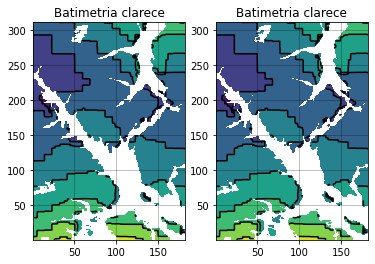

In [ ]:
# Data to plot.
x, y = np.meshgrid(xi_rho, eta_rho)
z = batb

# Mask various z values.
"""mask = np.zeros_like(z, dtype=bool)
mask[2, 3:5] = True
mask[3:5, 4] = True
mask[7, 2] = True
mask[5, 0] = True
mask[0, 6] = True"""
z = np.ma.array(z, mask=mask)

corner_masks = [False, True]
fig, axs = plt.subplots(ncols=2)
for ax, corner_mask in zip(axs, corner_masks):
    cs = ax.contourf(x, y, z, corner_mask=corner_mask)
    ax.contour(cs, colors='k')
    ax.set_title('Batimetria clarece'.format(corner_mask))

    # Plot grid.
    ax.grid(c='k', ls='-', alpha=0.3)


plt.show()

## Datos explorados y revisados como arreglos de numpy

In [ ]:
spherical

<class 'netCDF4._netCDF4.Variable'>
|S1 spherical()
    long_name: grid type logical switch
    option_T: spherical
    option_F: cartesian
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of   used

In [ ]:
spherical = np.array(ds.variables['spherical'][:])
spherical

array(b'T', dtype='|S1')

In [ ]:
xl

<class 'netCDF4._netCDF4.Variable'>
float32 xl()
    long_name: domain length in the XI-direction
    units: meter
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
xl = np.array(ds.variables['xl'][:])
xl

array(0.)

In [ ]:
el

<class 'netCDF4._netCDF4.Variable'>
float32 el()
    long_name: domain length in the ETA-direction
    units: meter
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
el = np.array(ds.variables['el'][:])
el

array(0.)

In [ ]:
xi_rho

<class 'netCDF4._netCDF4.Variable'>
float32 xi_rho(xi_rho)
    long_name: x-dimension of the grid
    standard_name: x_grid_index
    axis: X
    c_grid_dynamic_range: 2:181
unlimited dimensions: 
current shape = (182,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
xi_rho = np.array(ds.variables['xi_rho'][:])
xi_rho

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 15

In [ ]:
xi_u

<class 'netCDF4._netCDF4.Variable'>
float32 xi_u(xi_u)
    long_name: x-dimension of the grid at u location
    standard_name: x_grid_index_at_u_location
    axis: X
    c_grid_axis_shift: 0.5
    c_grid_dynamic_range: 2:180
unlimited dimensions: 
current shape = (181,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
xi_u = np.array(ds.variables['xi_u'][:])
xi_u

array([  1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,   9.5,
        10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,  18.5,
        19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,  27.5,
        28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5,  35.5,  36.5,
        37.5,  38.5,  39.5,  40.5,  41.5,  42.5,  43.5,  44.5,  45.5,
        46.5,  47.5,  48.5,  49.5,  50.5,  51.5,  52.5,  53.5,  54.5,
        55.5,  56.5,  57.5,  58.5,  59.5,  60.5,  61.5,  62.5,  63.5,
        64.5,  65.5,  66.5,  67.5,  68.5,  69.5,  70.5,  71.5,  72.5,
        73.5,  74.5,  75.5,  76.5,  77.5,  78.5,  79.5,  80.5,  81.5,
        82.5,  83.5,  84.5,  85.5,  86.5,  87.5,  88.5,  89.5,  90.5,
        91.5,  92.5,  93.5,  94.5,  95.5,  96.5,  97.5,  98.5,  99.5,
       100.5, 101.5, 102.5, 103.5, 104.5, 105.5, 106.5, 107.5, 108.5,
       109.5, 110.5, 111.5, 112.5, 113.5, 114.5, 115.5, 116.5, 117.5,
       118.5, 119.5, 120.5, 121.5, 122.5, 123.5, 124.5, 125.5, 126.5,
       127.5, 128.5,

In [ ]:
eta_rho

<class 'netCDF4._netCDF4.Variable'>
float32 eta_rho(eta_rho)
    long_name: y-dimension of the grid
    standard_name: y_grid_index
    axis: Y
    c_grid_dynamic_range: 2:310
unlimited dimensions: 
current shape = (311,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
eta_rho = np.array(ds.variables['eta_rho'][:])
eta_rho

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 15

In [ ]:
eta_v

<class 'netCDF4._netCDF4.Variable'>
float32 eta_v(eta_v)
    long_name: y-dimension of the grid at v location
    standard_name: x_grid_index_at_v_location
    axis: Y
    c_grid_axis_shift: 0.5
    c_grid_dynamic_range: 2:309
unlimited dimensions: 
current shape = (310,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
eta_v = np.array(ds.variables['eta_v'][:])
eta_v

array([  1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,   9.5,
        10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,  18.5,
        19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,  27.5,
        28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5,  35.5,  36.5,
        37.5,  38.5,  39.5,  40.5,  41.5,  42.5,  43.5,  44.5,  45.5,
        46.5,  47.5,  48.5,  49.5,  50.5,  51.5,  52.5,  53.5,  54.5,
        55.5,  56.5,  57.5,  58.5,  59.5,  60.5,  61.5,  62.5,  63.5,
        64.5,  65.5,  66.5,  67.5,  68.5,  69.5,  70.5,  71.5,  72.5,
        73.5,  74.5,  75.5,  76.5,  77.5,  78.5,  79.5,  80.5,  81.5,
        82.5,  83.5,  84.5,  85.5,  86.5,  87.5,  88.5,  89.5,  90.5,
        91.5,  92.5,  93.5,  94.5,  95.5,  96.5,  97.5,  98.5,  99.5,
       100.5, 101.5, 102.5, 103.5, 104.5, 105.5, 106.5, 107.5, 108.5,
       109.5, 110.5, 111.5, 112.5, 113.5, 114.5, 115.5, 116.5, 117.5,
       118.5, 119.5, 120.5, 121.5, 122.5, 123.5, 124.5, 125.5, 126.5,
       127.5, 128.5,

In [ ]:
Vtransform

<class 'netCDF4._netCDF4.Variable'>
float32 Vtransform()
    long_name: vertical terrain-following transformation equatio
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
Vtransform = np.array(ds.variables['Vtransform'][:])
Vtransform

array(2., dtype=float32)

In [ ]:
s_rho

<class 'netCDF4._netCDF4.Variable'>
float32 s_rho(s_rho)
    long_name: S-coordinate at RHO-points
    axis: Z
    positive: up
    standard_name: ocean_s_coordinate_g2
    formula_terms: s: sc_r C: Cs_r eta: zeta depth: h depth_c: hc
unlimited dimensions: 
current shape = (30,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
s_rho = np.array(ds.variables['s_rho'][:])
s_rho

array([-0.98333335, -0.95      , -0.9166667 , -0.8833333 , -0.85      ,
       -0.81666666, -0.78333336, -0.75      , -0.71666664, -0.68333334,
       -0.65      , -0.6166667 , -0.5833333 , -0.55      , -0.51666665,
       -0.48333332, -0.45      , -0.41666666, -0.38333333, -0.35      ,
       -0.31666666, -0.28333333, -0.25      , -0.21666667, -0.18333334,
       -0.15      , -0.11666667, -0.08333334, -0.05      , -0.01666667],
      dtype=float32)

In [ ]:
s_w

<class 'netCDF4._netCDF4.Variable'>
float32 s_w(s_w)
    long_name: S-coordinate at W-points
    axis: Z
    positive: up
    c_grid_axis_shift: -0.5
    standard_name: ocean_s_coordinate_g2_at_w_location
    formula_terms: s: sc_w C: Cs_w eta: zeta depth: h depth_c: hc
unlimited dimensions: 
current shape = (31,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
s_w = np.array(ds.variables['s_w'][:])
s_w

array([-1.        , -0.96666664, -0.93333334, -0.9       , -0.8666667 ,
       -0.8333333 , -0.8       , -0.76666665, -0.73333335, -0.7       ,
       -0.6666667 , -0.6333333 , -0.6       , -0.56666666, -0.53333336,
       -0.5       , -0.46666667, -0.43333334, -0.4       , -0.36666667,
       -0.33333334, -0.3       , -0.26666668, -0.23333333, -0.2       ,
       -0.16666667, -0.13333334, -0.1       , -0.06666667, -0.03333334,
        0.        ], dtype=float32)

In [ ]:
sc_r

<class 'netCDF4._netCDF4.Variable'>
float32 sc_r(s_rho)
    long_name: ocean s roms coordinate at rho point
    Vtransform: 2
unlimited dimensions: 
current shape = (30,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
sc_r = np.array(ds.variables['sc_r'][:])
sc_r

array([-0.98333335, -0.95      , -0.9166667 , -0.8833333 , -0.85      ,
       -0.81666666, -0.78333336, -0.75      , -0.71666664, -0.68333334,
       -0.65      , -0.6166667 , -0.5833333 , -0.55      , -0.51666665,
       -0.48333332, -0.45      , -0.41666666, -0.38333333, -0.35      ,
       -0.31666666, -0.28333333, -0.25      , -0.21666667, -0.18333334,
       -0.15      , -0.11666667, -0.08333334, -0.05      , -0.01666667],
      dtype=float32)

In [ ]:
sc_w

<class 'netCDF4._netCDF4.Variable'>
float32 sc_w(s_w)
    long_name: ocean s roms coordinate at w point
    Vtransform: 2
unlimited dimensions: 
current shape = (31,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
sc_w = np.array(ds.variables['sc_w'][:])
sc_w

array([-1.        , -0.96666664, -0.93333334, -0.9       , -0.8666667 ,
       -0.8333333 , -0.8       , -0.76666665, -0.73333335, -0.7       ,
       -0.6666667 , -0.6333333 , -0.6       , -0.56666666, -0.53333336,
       -0.5       , -0.46666667, -0.43333334, -0.4       , -0.36666667,
       -0.33333334, -0.3       , -0.26666668, -0.23333333, -0.2       ,
       -0.16666667, -0.13333334, -0.1       , -0.06666667, -0.03333334,
        0.        ], dtype=float32)

In [ ]:
Cs_r

<class 'netCDF4._netCDF4.Variable'>
float32 Cs_r(s_rho)
    long_name: S-coordinate stretching curves at RHO-points
unlimited dimensions: 
current shape = (30,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
Cs_r = np.array(ds.variables['Cs_r'][:])
Cs_r

array([-9.0436453e-01, -7.3953068e-01, -6.0457677e-01, -4.9408656e-01,
       -4.0362576e-01, -3.2956383e-01, -2.6892841e-01, -2.1928595e-01,
       -1.7864418e-01, -1.4537199e-01, -1.1813402e-01, -9.5837146e-02,
       -7.7586502e-02, -6.2649630e-02, -5.0427064e-02, -4.0428262e-02,
       -3.2251939e-02, -2.5569953e-02, -2.0114131e-02, -1.5665513e-02,
       -1.2045557e-02, -9.1089839e-03, -6.7379386e-03, -4.8372624e-03,
       -3.3306750e-03, -2.1577112e-03, -1.2712961e-03, -6.3585461e-04,
       -2.2588432e-04, -2.4931631e-05], dtype=float32)

In [ ]:
Cs_w

<class 'netCDF4._netCDF4.Variable'>
float32 Cs_w(s_w)
    long_name: S-coordinate stretching curves at W-points
unlimited dimensions: 
current shape = (31,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
Cs_w = np.array(ds.variables['Cs_w'][:])
Cs_w

array([-1.0000000e+00, -8.1783015e-01, -6.6868258e-01, -5.4657161e-01,
       -4.4659638e-01, -3.6474463e-01, -2.9773128e-01, -2.4286690e-01,
       -1.9794956e-01, -1.6117659e-01, -1.3107216e-01, -1.0642807e-01,
       -8.6255260e-02, -6.9744125e-02, -5.6232024e-02, -4.5176659e-02,
       -3.6134347e-02, -2.8742185e-02, -2.2703499e-02, -1.7775936e-02,
       -1.3761736e-02, -1.0499796e-02, -7.8592012e-03, -5.7339752e-03,
       -4.0388261e-03, -2.7057217e-03, -1.6811593e-03, -9.2401978e-04,
       -4.0391658e-04, -9.9976045e-05,  0.0000000e+00], dtype=float32)

In [ ]:
hc

<class 'netCDF4._netCDF4.Variable'>
float32 hc()
    long_name: S-coordinate parameter, critical depth
    units: meter
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
hc = np.array(ds.variables['hc'][:])
hc

array(70., dtype=float32)

In [ ]:
h

<class 'netCDF4._netCDF4.Variable'>
float32 h(eta_rho, xi_rho)
    long_name: bathymetry at RHO-points
    units: meter
    field: bath, scalar
    standard_name: model_sea_floor_depth_below_geoid
    coordinates: lat_rho lon_rho
unlimited dimensions: 
current shape = (311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
h = np.array(ds.variables['h'][:])
h

array([[359.7875 , 366.198  , 366.198  , ..., 260.75705, 260.75705,
        352.95547],
       [359.7875 , 359.7875 , 366.198  , ..., 238.96696, 238.96696,
        275.99384],
       [359.7875 , 359.7875 , 359.84326, ..., 238.96696, 238.96696,
        275.99384],
       ...,
       [174.07526, 174.07526, 174.07526, ..., 300.43057, 300.43057,
        300.43057],
       [174.07526, 174.07526, 174.07526, ..., 300.43057, 300.43057,
        300.43057],
       [174.83472, 174.83472, 174.83472, ..., 290.37888, 290.37888,
        295.11737]], dtype=float32)

In [ ]:
f

<class 'netCDF4._netCDF4.Variable'>
float32 f(eta_rho, xi_rho)
    long_name: Coriolis parameter at RHO-points
    units: second-1
    field: coriolis, scalar
    standard_name: coriolis_parameter
    coordinates: lat_rho lon_rho
unlimited dimensions: 
current shape = (311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
f = np.array(ds.variables['f'][:])
f

array([[-0.00011847, -0.00011847, -0.00011847, ..., -0.00011847,
        -0.00011847, -0.00011847],
       [-0.00011847, -0.00011847, -0.00011847, ..., -0.00011847,
        -0.00011847, -0.00011847],
       [-0.00011847, -0.00011847, -0.00011847, ..., -0.00011847,
        -0.00011847, -0.00011847],
       ...,
       [-0.00011792, -0.00011792, -0.00011792, ..., -0.00011792,
        -0.00011792, -0.00011792],
       [-0.00011791, -0.00011791, -0.00011791, ..., -0.00011791,
        -0.00011791, -0.00011791],
       [-0.00011791, -0.00011791, -0.00011791, ..., -0.00011791,
        -0.00011791, -0.00011791]], dtype=float32)

In [ ]:
pm

<class 'netCDF4._netCDF4.Variable'>
float32 pm(eta_rho, xi_rho)
    long_name: curvilinear coordinates metric in X
    units: meter-1
    field: pm, scalar
    coordinates: lat_rho lon_rho
    standard_name: inverse_of_cell_x_size
unlimited dimensions: 
current shape = (311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
pm = np.array(ds.variables['pm'][:])
pm

array([[0.00749817, 0.00749817, 0.00749817, ..., 0.00749817, 0.00749817,
        0.00749817],
       [0.00749796, 0.00749796, 0.00749796, ..., 0.00749796, 0.00749796,
        0.00749796],
       [0.00749774, 0.00749774, 0.00749774, ..., 0.00749774, 0.00749774,
        0.00749774],
       ...,
       [0.00743134, 0.00743134, 0.00743134, ..., 0.00743134, 0.00743134,
        0.00743134],
       [0.00743112, 0.00743112, 0.00743112, ..., 0.00743112, 0.00743112,
        0.00743112],
       [0.00743091, 0.00743091, 0.00743091, ..., 0.00743091, 0.00743091,
        0.00743091]], dtype=float32)

In [ ]:
pn

<class 'netCDF4._netCDF4.Variable'>
float32 pn(eta_rho, xi_rho)
    long_name: curvilinear coordinates metric in ET
    units: meter-1
    field: pn, scalar
    coordinates: lat_rho lon_rho
    standard_name: inverse_of_cell_y_size
unlimited dimensions: 
current shape = (311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
pn = np.array(ds.variables['pn'][yj][xj])
pn

array(0.00749915, dtype=float32)

In [ ]:
lon_rho

<class 'netCDF4._netCDF4.Variable'>
float32 lon_rho(eta_rho, xi_rho)
    long_name: longitude of RHO-points
    units: degree_east
    field: lon_rho, scalar
    standard_name: longitude
unlimited dimensions: 
current shape = (311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
lon_rho = np.array(ds.variables['lon_rho'][:])
lon_rho

array([[-71.93621, -71.93416, -71.9321 , ..., -71.5679 , -71.56584,
        -71.56379],
       [-71.93621, -71.93416, -71.9321 , ..., -71.5679 , -71.56584,
        -71.56379],
       [-71.93621, -71.93416, -71.9321 , ..., -71.5679 , -71.56584,
        -71.56379],
       ...,
       [-71.93621, -71.93416, -71.9321 , ..., -71.5679 , -71.56584,
        -71.56379],
       [-71.93621, -71.93416, -71.9321 , ..., -71.5679 , -71.56584,
        -71.56379],
       [-71.93621, -71.93416, -71.9321 , ..., -71.5679 , -71.56584,
        -71.56379]], dtype=float32)

In [ ]:
lat_rho

<class 'netCDF4._netCDF4.Variable'>
float32 lat_rho(eta_rho, xi_rho)
    long_name: latitude of RHO-points
    units: degree_north
    field: lat_rho, scalar
    standard_name: latitude
unlimited dimensions: 
current shape = (311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
lat_rho = np.array(ds.variables['lat_rho'][:])
lat_rho

array([[-54.322098, -54.322098, -54.322098, ..., -54.322098, -54.322098,
        -54.322098],
       [-54.320896, -54.320896, -54.320896, ..., -54.320896, -54.320896,
        -54.320896],
       [-54.3197  , -54.3197  , -54.3197  , ..., -54.3197  , -54.3197  ,
        -54.3197  ],
       ...,
       [-53.951256, -53.951256, -53.951256, ..., -53.951256, -53.951256,
        -53.951256],
       [-53.950047, -53.950047, -53.950047, ..., -53.950047, -53.950047,
        -53.950047],
       [-53.948837, -53.948837, -53.948837, ..., -53.948837, -53.948837,
        -53.948837]], dtype=float32)

In [ ]:
lon_u

<class 'netCDF4._netCDF4.Variable'>
float32 lon_u(eta_rho, xi_u)
    long_name: longitude of U-points
    units: degree_east
    field: lon_u, scalar
    standard_name: longitude_at_u_location
unlimited dimensions: 
current shape = (311, 181)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
lon_u = np.array(ds.variables['lon_u'][:])
lon_u

array([[-71.93519, -71.93313, -71.93107, ..., -71.56893, -71.56687,
        -71.56481],
       [-71.93519, -71.93313, -71.93107, ..., -71.56893, -71.56687,
        -71.56481],
       [-71.93519, -71.93313, -71.93107, ..., -71.56893, -71.56687,
        -71.56481],
       ...,
       [-71.93519, -71.93313, -71.93107, ..., -71.56893, -71.56687,
        -71.56481],
       [-71.93519, -71.93313, -71.93107, ..., -71.56893, -71.56687,
        -71.56481],
       [-71.93519, -71.93313, -71.93107, ..., -71.56893, -71.56687,
        -71.56481]], dtype=float32)

In [ ]:
lat_u

<class 'netCDF4._netCDF4.Variable'>
float32 lat_u(eta_rho, xi_u)
    long_name: latitude of U-points
    units: degree_north
    field: lat_u, scalar
    standard_name: latitude_at_u_location
unlimited dimensions: 
current shape = (311, 181)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
lat_u = np.array(ds.variables['lat_u'][:])
lat_u

array([[-54.322098, -54.322098, -54.322098, ..., -54.322098, -54.322098,
        -54.322098],
       [-54.320896, -54.320896, -54.320896, ..., -54.320896, -54.320896,
        -54.320896],
       [-54.3197  , -54.3197  , -54.3197  , ..., -54.3197  , -54.3197  ,
        -54.3197  ],
       ...,
       [-53.951256, -53.951256, -53.951256, ..., -53.951256, -53.951256,
        -53.951256],
       [-53.950047, -53.950047, -53.950047, ..., -53.950047, -53.950047,
        -53.950047],
       [-53.948837, -53.948837, -53.948837, ..., -53.948837, -53.948837,
        -53.948837]], dtype=float32)

In [ ]:
lon_v

<class 'netCDF4._netCDF4.Variable'>
float32 lon_v(eta_v, xi_rho)
    long_name: longitude of V-points
    units: degree_east
    field: lon_v, scalar
    standard_name: longitude_at_v_location
unlimited dimensions: 
current shape = (310, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
lon_v = np.array(ds.variables['lon_v'][:])
lon_v

array([[-71.93621, -71.93416, -71.9321 , ..., -71.5679 , -71.56584,
        -71.56379],
       [-71.93621, -71.93416, -71.9321 , ..., -71.5679 , -71.56584,
        -71.56379],
       [-71.93621, -71.93416, -71.9321 , ..., -71.5679 , -71.56584,
        -71.56379],
       ...,
       [-71.93621, -71.93416, -71.9321 , ..., -71.5679 , -71.56584,
        -71.56379],
       [-71.93621, -71.93416, -71.9321 , ..., -71.5679 , -71.56584,
        -71.56379],
       [-71.93621, -71.93416, -71.9321 , ..., -71.5679 , -71.56584,
        -71.56379]], dtype=float32)

In [ ]:
lat_v

<class 'netCDF4._netCDF4.Variable'>
float32 lat_v(eta_v, xi_rho)
    long_name: latitude of V-points
    units: degree_north
    field: lat_v, scalar
    standard_name: latitude_at_v_location
unlimited dimensions: 
current shape = (310, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
lat_v = np.array(ds.variables['lat_v'][:])
lat_v

array([[-54.32147 , -54.32147 , -54.32147 , ..., -54.32147 , -54.32147 ,
        -54.32147 ],
       [-54.32027 , -54.32027 , -54.32027 , ..., -54.32027 , -54.32027 ,
        -54.32027 ],
       [-54.319073, -54.319073, -54.319073, ..., -54.319073, -54.319073,
        -54.319073],
       ...,
       [-53.95183 , -53.95183 , -53.95183 , ..., -53.95183 , -53.95183 ,
        -53.95183 ],
       [-53.950623, -53.950623, -53.950623, ..., -53.950623, -53.950623,
        -53.950623],
       [-53.949413, -53.949413, -53.949413, ..., -53.949413, -53.949413,
        -53.949413]], dtype=float32)

In [ ]:
angle

<class 'netCDF4._netCDF4.Variable'>
float32 angle(eta_rho, xi_rho)
    long_name: angle between XI-axis and EAST
    units: radians
    field: angle, scalar
    coordinates: lat_rho lon_rho
unlimited dimensions: 
current shape = (311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
angle = np.array(ds.variables['angle'][:])
angle

array([[-0.00118146, -0.00118146, -0.00118146, ..., -0.00118146,
        -0.00118146, -0.00118146],
       [-0.00118144, -0.00118144, -0.00118144, ..., -0.00118144,
        -0.00118144, -0.00118144],
       [-0.00118142, -0.00118142, -0.00118142, ..., -0.00118142,
        -0.00118142, -0.00118142],
       ...,
       [-0.00117594, -0.00117594, -0.00117594, ..., -0.00117594,
        -0.00117594, -0.00117594],
       [-0.00117592, -0.00117592, -0.00117592, ..., -0.00117592,
        -0.00117592, -0.00117592],
       [-0.0011759 , -0.0011759 , -0.0011759 , ..., -0.0011759 ,
        -0.0011759 , -0.0011759 ]], dtype=float32)

In [ ]:
mask_rho

<class 'netCDF4._netCDF4.Variable'>
float32 mask_rho(eta_rho, xi_rho)
    long_name: mask on RHO-points
    option_0: land
    option_1: water
    standard_name: land_binary_mask
    coordinates: lat_rho lon_rho
unlimited dimensions: 
current shape = (311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
mask_rho = np.array(ds.variables['mask_rho'][:])
mask_rho

array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
time_step

<class 'netCDF4._netCDF4.Variable'>
int32 time_step(time, auxil)
    long_name: time step and record numbers from initialization
unlimited dimensions: time
current shape = (1023, 4)
filling on, default _FillValue of -2147483647 used

In [ ]:
time_step = np.array(ds.variables['time_step'][0,:])
time_step

array([1, 0, 1, 0], dtype=int32)

In [ ]:
scrum_time

<class 'netCDF4._netCDF4.Variable'>
float64 scrum_time(time)
    long_name: time since initialization
    units: second
    field: time, scalar, series
    standard_name: time
    axis: T
unlimited dimensions: time
current shape = (1023,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
scrum_time = np.array(ds.variables['scrum_time'][0,])
scrum_time

array(3542400.)

In [ ]:
time

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    long_name: time since initialization
    units: second
    field: time, scalar, series
    standard_name: time
    axis: T
unlimited dimensions: time
current shape = (1023,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
time = np.array(ds.variables['time'][0])
time

array(3542400.)

In [ ]:
zeta

<class 'netCDF4._netCDF4.Variable'>
float32 zeta(time, eta_rho, xi_rho)
    long_name: free-surface
    units: meter
    field: free-surface, scalar, series
    standard_name: sea_surface_height
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
zeta = np.array(ds.variables['zeta'][1022,yj,xj])
zeta

array(0.22543086, dtype=float32)

In [ ]:
ubar

<class 'netCDF4._netCDF4.Variable'>
float32 ubar(time, eta_rho, xi_u)
    long_name: vertically integrated u-momentum component
    units: meter second-1
    field: ubar-velocity, scalar, series
    standard_name: barotropic_sea_water_x_velocity_at_u_location
    coordinates: lat_u lon_u
unlimited dimensions: time
current shape = (1023, 311, 181)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
ubar = np.array(ds.variables['ubar'][1022,yj,xj])
ubar

array(0.23873474, dtype=float32)

In [ ]:
vbar

<class 'netCDF4._netCDF4.Variable'>
float32 vbar(time, eta_v, xi_rho)
    long_name: vertically integrated v-momentum component
    units: meter second-1
    field: vbar-velocity, scalar, series
    standard_name: barotropic_sea_water_y_velocity_at_v_location
    coordinates: lat_v lon_v
unlimited dimensions: time
current shape = (1023, 310, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
vbar = np.array(ds.variables['vbar'][1022,yj,xj])
vbar

array(-0.08705606, dtype=float32)

In [ ]:
u

<class 'netCDF4._netCDF4.Variable'>
float32 u(time, s_rho, eta_rho, xi_u)
    long_name: u-momentum component
    units: meter second-1
    field: u-velocity, scalar, series
    standard_name: sea_water_x_velocity_at_u_location
    coordinates: lat_u lon_u
unlimited dimensions: time
current shape = (1023, 30, 311, 181)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
u = np.array(ds.variables['u'][1022,:,yj,xj])
u

array([0.2148987 , 0.24492753, 0.2593668 , 0.2555415 , 0.24480553,
       0.24491829, 0.25168708, 0.2565407 , 0.24210542, 0.20395945,
       0.20965742, 0.21566266, 0.22003648, 0.22350647, 0.22676675,
       0.2293513 , 0.23112701, 0.23216185, 0.23264791, 0.2329806 ,
       0.23389529, 0.23484147, 0.2350746 , 0.23468435, 0.23576531,
       0.23921975, 0.2449096 , 0.2533423 , 0.266522  , 0.2920409 ],
      dtype=float32)

In [ ]:
v

<class 'netCDF4._netCDF4.Variable'>
float32 v(time, s_rho, eta_v, xi_rho)
    long_name: v-momentum component
    units: meter second-1
    field: v-velocity, scalar, series
    standard_name: sea_water_y_velocity_at_v_location
    coordinates: lat_v lon_v
unlimited dimensions: time
current shape = (1023, 30, 310, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
v = np.array(ds.variables['v'][1022,:,yj,xj])
v

array([-0.15194827, -0.13977149, -0.09516379, -0.07533859, -0.06507479,
       -0.03101144, -0.0061653 , -0.00620287, -0.08460508, -0.13922651,
       -0.13639061, -0.13144292, -0.12493734, -0.11793689, -0.10727948,
       -0.0974773 , -0.0886592 , -0.08081498, -0.07419837, -0.06800587,
       -0.04755615, -0.02509957, -0.00350336,  0.01425382,  0.02717376,
        0.03542368,  0.03985077,  0.04132149,  0.03988726,  0.03280168],
      dtype=float32)

In [ ]:
temp

<class 'netCDF4._netCDF4.Variable'>
float32 temp(time, s_rho, eta_rho, xi_rho)
    long_name: potential temperature
    units: Celsius
    field: temperature, scalar, series
    standard_name: sea_water_potential_temperature
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
temp = np.array(ds.variables['temp'][1022,:,yj,xj])
temp

array([7.4208117, 7.610876 , 7.6742806, 7.717456 , 7.842849 , 8.0323   ,
       8.167999 , 8.204437 , 8.312634 , 8.498767 , 8.56077  , 8.55475  ,
       8.547588 , 8.538765 , 8.52855  , 8.518278 , 8.508864 , 8.5008745,
       8.495165 , 8.49201  , 8.484939 , 8.488573 , 8.511042 , 8.550122 ,
       8.592517 , 8.6277075, 8.65187  , 8.665769 , 8.671312 , 8.669311 ],
      dtype=float32)

In [ ]:
salt

<class 'netCDF4._netCDF4.Variable'>
float32 salt(time, s_rho, eta_rho, xi_rho)
    long_name: salinity
    units: PSU
    field: salinity, scalar, series
    standard_name: sea_water_salinity
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
salt = np.array(ds.variables['salt'][1022,:,yj,xj])
salt

array([33.948368, 33.915005, 33.904205, 33.8966  , 33.874695, 33.841885,
       33.8184  , 33.812084, 33.79296 , 33.760376, 33.74982 , 33.750904,
       33.75217 , 33.75373 , 33.75553 , 33.75733 , 33.758976, 33.76037 ,
       33.761402, 33.761986, 33.76343 , 33.76318 , 33.75982 , 33.75361 ,
       33.746593, 33.740322, 33.735443, 33.731884, 33.72932 , 33.727276],
      dtype=float32)

In [ ]:
DIC

<class 'netCDF4._netCDF4.Variable'>
float32 DIC(time, s_rho, eta_rho, xi_rho)
    long_name: Dissolved inorganic carbon
    units: umol C L-1
    field: DIC, scalar, series
    standard_name: mole_concentration_of_dissolved_inorganic_carbon_in_sea_water
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
DIC = np.array(ds.variables['DIC'][1022,:,yj,xj])
DIC

array([2107.6907, 2105.2578, 2103.8784, 2103.1113, 2101.3997, 2098.882 ,
       2096.7397, 2095.0515, 2093.9683, 2093.878 , 2094.0261, 2094.0623,
       2094.093 , 2094.1208, 2094.1448, 2094.17  , 2094.196 , 2094.228 ,
       2094.2634, 2094.3052, 2094.6433, 2095.0645, 2095.4558, 2095.8167,
       2096.0857, 2096.2393, 2096.3054, 2096.3208, 2096.3064, 2096.253 ],
      dtype=float32)

In [ ]:
TALK

<class 'netCDF4._netCDF4.Variable'>
float32 TALK(time, s_rho, eta_rho, xi_rho)
    long_name: Total Alkalinity
    units: umol C L-1
    field: Alkalinity, scalar, series
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
TALK = np.array(ds.variables['TALK'][1022,:,yj,xj])
TALK

array([2278.9614, 2279.0356, 2278.1743, 2277.779 , 2277.183 , 2276.4739,
       2275.7278, 2274.599 , 2274.285 , 2275.706 , 2276.5095, 2276.5046,
       2276.4678, 2276.4092, 2276.3354, 2276.2698, 2276.2097, 2276.1587,
       2276.131 , 2276.128 , 2276.2554, 2276.6047, 2277.135 , 2277.7646,
       2278.347 , 2278.786 , 2279.0776, 2279.2573, 2279.364 , 2279.4275],
      dtype=float32)

In [ ]:
O2

<class 'netCDF4._netCDF4.Variable'>
float32 O2(time, s_rho, eta_rho, xi_rho)
    long_name: Oxygen
    units: umol L-1
    field: Oxygen, scalar, series
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
O2 = np.array(ds.variables['O2'][1022,:,yj,xj])
O2

array([298.4915 , 298.54453, 298.54184, 298.57983, 298.53674, 298.3723 ,
       298.27957, 298.30884, 298.22275, 297.88776, 297.72278, 297.7267 ,
       297.7357 , 297.74905, 297.76508, 297.77972, 297.79263, 297.80316,
       297.80896, 297.81015, 297.7829 , 297.70175, 297.57336, 297.41803,
       297.2711 , 297.1564 , 297.07718, 297.0261 , 296.9937 , 296.96902],
      dtype=float32)

In [ ]:
CACO3

<class 'netCDF4._netCDF4.Variable'>
float32 CACO3(time, s_rho, eta_rho, xi_rho)
    long_name: Calcite
    units: umol C L-1
    field: Calcite, scalar, series
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
CACO3 = np.array(ds.variables['CACO3'][1022,:,yj,xj])
CACO3

array([0.06662946, 0.05463212, 0.05174529, 0.04983812, 0.04413512,
       0.03484054, 0.02853907, 0.02591888, 0.02175277, 0.01754868,
       0.01702006, 0.01718577, 0.01740642, 0.01769561, 0.01802683,
       0.01834999, 0.01863561, 0.01886049, 0.01902973, 0.0191454 ,
       0.01947353, 0.01956175, 0.01924597, 0.01854244, 0.01764403,
       0.01672921, 0.01588794, 0.01511261, 0.01430921, 0.01318254],
      dtype=float32)

In [ ]:
PO4

<class 'netCDF4._netCDF4.Variable'>
float32 PO4(time, s_rho, eta_rho, xi_rho)
    long_name: Phosphate
    units: umol P L-1
    field: Phosphate, scalar, series
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
PO4 = np.array(ds.variables['PO4'][1022,:,yj,xj])
PO4

array([1.2469101, 1.2295123, 1.2217466, 1.2172613, 1.2039514, 1.1838087,
       1.1691653, 1.164936 , 1.1530823, 1.1333052, 1.1269509, 1.1276022,
       1.12837  , 1.1293226, 1.1304322, 1.1315591, 1.1326097, 1.1335279,
       1.1342562, 1.1348088, 1.1363564, 1.1363605, 1.1344583, 1.1306083,
       1.1262106, 1.1223418, 1.1194305, 1.1174815, 1.1163269, 1.1158508],
      dtype=float32)

In [ ]:
POC

<class 'netCDF4._netCDF4.Variable'>
float32 POC(time, s_rho, eta_rho, xi_rho)
    long_name: Small particulate organic carbon
    units: umol C L-1
    field: Small particles, scalar, series
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
POC = np.array(ds.variables['POC'][1022,:,yj,xj])
POC

array([1.1173687, 1.191927 , 1.2222923, 1.2402668, 1.2733521, 1.3117598,
       1.3353121, 1.3492421, 1.3361251, 1.2908622, 1.2752596, 1.2770435,
       1.280169 , 1.285301 , 1.293352 , 1.3054069, 1.3226476, 1.3452542,
       1.375159 , 1.4328473, 1.5920537, 1.6820815, 1.7485754, 1.7964246,
       1.8171569, 1.8167934, 1.8025657, 1.7792624, 1.7481271, 1.7018741],
      dtype=float32)

In [ ]:
Si

<class 'netCDF4._netCDF4.Variable'>
float32 Si(time, s_rho, eta_rho, xi_rho)
    long_name: Silicate
    units: umol Si L-1
    field: Silicate, scalar, series
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
Si = np.array(ds.variables['Si'][1022,:,yj,xj])
Si

array([15.838388, 17.368015, 17.749138, 18.129276, 18.930315, 20.103617,
       21.009817, 21.37004 , 22.05395 , 22.969282, 23.08337 , 23.050446,
       23.01429 , 22.979662, 22.94492 , 22.90895 , 22.873234, 22.841818,
       22.81386 , 22.786842, 22.636053, 22.521545, 22.47046 , 22.472328,
       22.529446, 22.625399, 22.737946, 22.854324, 22.979307, 23.163994],
      dtype=float32)

In [ ]:
NANO

<class 'netCDF4._netCDF4.Variable'>
float32 NANO(time, s_rho, eta_rho, xi_rho)
    long_name: Nanophytoplankton
    units: umol C L-1
    field: Nanophytoplankton, scalar, series
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
NANO = np.array(ds.variables['NANO'][1022,:,yj,xj])
NANO

array([0.53154653, 0.5425829 , 0.5424466 , 0.5488188 , 0.55677736,
       0.5623243 , 0.56542534, 0.560406  , 0.5745363 , 0.61614716,
       0.62745506, 0.6258211 , 0.62386733, 0.6214081 , 0.6184495 ,
       0.6153939 , 0.6125983 , 0.6103723 , 0.60857075, 0.6070455 ,
       0.6009492 , 0.5977729 , 0.5978622 , 0.60109234, 0.6064327 ,
       0.6123141 , 0.61757225, 0.6217364 , 0.62479347, 0.6270026 ],
      dtype=float32)

In [ ]:
ZOO

<class 'netCDF4._netCDF4.Variable'>
float32 ZOO(time, s_rho, eta_rho, xi_rho)
    long_name: Microzooplankton
    units: umol C L-1
    field: Microzooplankton, scalar, series
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
ZOO = np.array(ds.variables['ZOO'][1022,:,yj,xj])
ZOO

array([0.5838417 , 0.79199   , 0.84862936, 0.89264673, 1.015847  ,
       1.2044935 , 1.3484807 , 1.3987435 , 1.5036685 , 1.654716  ,
       1.6947974 , 1.6903162 , 1.6852779 , 1.6789939 , 1.6715423 ,
       1.6638411 , 1.6566898 , 1.6508071 , 1.646278  , 1.6430749 ,
       1.6340104 , 1.6321924 , 1.6443584 , 1.6704507 , 1.7012876 ,
       1.7296499 , 1.7520121 , 1.7679962 , 1.7787101 , 1.7856194 ],
      dtype=float32)

In [ ]:
DOC

<class 'netCDF4._netCDF4.Variable'>
float32 DOC(time, s_rho, eta_rho, xi_rho)
    long_name: Dissolved organic carbon
    units: umol C L-1
    field: DOC, scalar, series
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
DOC = np.array(ds.variables['DOC'][1022,:,yj,xj])
DOC

array([12.850358 , 13.199703 , 13.318181 , 13.397225 , 13.601062 ,
       13.901001 , 14.122078 , 14.201801 , 14.350107 , 14.5517025,
       14.600914 , 14.594252 , 14.586936 , 14.578053 , 14.567914 ,
       14.558114 , 14.550058 , 14.54501  , 14.5430565, 14.54738  ,
       14.563694 , 14.580308 , 14.606033 , 14.643272 , 14.683453 ,
       14.719096 , 14.746941 , 14.766645 , 14.779183 , 14.785927 ],
      dtype=float32)

In [ ]:
DIA

<class 'netCDF4._netCDF4.Variable'>
float32 DIA(time, s_rho, eta_rho, xi_rho)
    long_name: Diatoms
    units: umol C L-1
    field: Diatoms, scalar, series
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
DIA = np.array(ds.variables['DIA'][1022,:,yj,xj])
DIA

array([0.50880986, 0.6705101 , 0.7315527 , 0.7793394 , 0.91339236,
       1.1175604 , 1.2678002 , 1.309668  , 1.4784608 , 1.782215  ,
       1.856201  , 1.846753  , 1.8359975 , 1.8224386 , 1.8059657 ,
       1.788799  , 1.7728289 , 1.7600739 , 1.7496814 , 1.7409052 ,
       1.7089876 , 1.6943253 , 1.7002875 , 1.7267779 , 1.7668748 ,
       1.808635  , 1.8442932 , 1.8714402 , 1.8906087 , 1.903914  ],
      dtype=float32)

In [ ]:
MESO

<class 'netCDF4._netCDF4.Variable'>
float32 MESO(time, s_rho, eta_rho, xi_rho)
    long_name: Mesozooplankton
    units: umol C L-1
    field: Mesozooplankton, scalar, series
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
MESO = np.array(ds.variables['MESO'][1022,:,yj,xj])
MESO

array([0.02637253, 0.03071168, 0.03212255, 0.03314429, 0.03621921,
       0.04091752, 0.04439311, 0.04540888, 0.04826011, 0.0529748 ,
       0.05447181, 0.05431941, 0.05414086, 0.05392038, 0.05366434,
       0.05340604, 0.05316928, 0.05296911, 0.05281878, 0.05273224,
       0.05251827, 0.05255555, 0.05307043, 0.05403606, 0.05513613,
       0.05612028, 0.05687901, 0.05741278, 0.05776527, 0.05798894],
      dtype=float32)

In [ ]:
BSI

<class 'netCDF4._netCDF4.Variable'>
float32 BSI(time, s_rho, eta_rho, xi_rho)
    long_name: Diatoms silicon
    units: umol Si L-1
    field: BSi, scalar, series
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
BSI = np.array(ds.variables['BSI'][1022,:,yj,xj])
BSI

array([0.08978148, 0.12232193, 0.1348801 , 0.14472651, 0.17221764,
       0.21446499, 0.24773048, 0.26035798, 0.29632804, 0.35709962,
       0.36683288, 0.36524135, 0.36350843, 0.36131793, 0.35853478,
       0.35548738, 0.3525694 , 0.3501202 , 0.348057  , 0.34621614,
       0.33754957, 0.33253378, 0.33157194, 0.3341803 , 0.3395961 ,
       0.34618002, 0.3523767 , 0.35741755, 0.36116317, 0.36387044],
      dtype=float32)

In [ ]:
FER

<class 'netCDF4._netCDF4.Variable'>
float32 FER(time, s_rho, eta_rho, xi_rho)
    long_name: Dissolved iron
    units: umol Fe L-1
    field: Iron, scalar, series
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
FER = np.array(ds.variables['FER'][1022,:,yj,xj])
FER

array([0.20692813, 0.22475706, 0.22793408, 0.23190108, 0.2398572 ,
       0.251862  , 0.2612552 , 0.2650121 , 0.27213958, 0.28146344,
       0.28280628, 0.282465  , 0.28207442, 0.28166622, 0.28127587,
       0.28089008, 0.2805133 , 0.28018245, 0.27988467, 0.2795891 ,
       0.27785087, 0.27648675, 0.2758689 , 0.27568337, 0.27605695,
       0.2768636 , 0.27790475, 0.27904063, 0.28030598, 0.28222868],
      dtype=float32)

In [ ]:
BFE

<class 'netCDF4._netCDF4.Variable'>
float32 BFE(time, s_rho, eta_rho, xi_rho)
    long_name: Iron in big particles
    units: umol Fe L-1
    field: BFE, scalar, series
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
BFE = np.array(ds.variables['BFE'][1022,:,yj,xj])
BFE

array([0.0010786 , 0.00098728, 0.00096212, 0.00094066, 0.00087083,
       0.00077168, 0.00071147, 0.00070491, 0.00062147, 0.00049723,
       0.00047139, 0.00047694, 0.00048358, 0.00049161, 0.00050052,
       0.00050908, 0.00051665, 0.00052292, 0.00052751, 0.0005301 ,
       0.00053718, 0.00053784, 0.00052778, 0.00050789, 0.00048355,
       0.0004593 , 0.00043711, 0.00041652, 0.0003949 , 0.00036409],
      dtype=float32)

In [ ]:
GOC

<class 'netCDF4._netCDF4.Variable'>
float32 GOC(time, s_rho, eta_rho, xi_rho)
    long_name: Big particulate organic carbon
    units: umol C L-1
    field: GOC, scalar, series
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
GOC = np.array(ds.variables['GOC'][1022,:,yj,xj])
GOC

array([0.16375296, 0.17182206, 0.17257413, 0.17305565, 0.17390326,
       0.17713143, 0.18350063, 0.19056469, 0.18517683, 0.16767521,
       0.16569607, 0.1665232 , 0.16771254, 0.16917299, 0.17075674,
       0.17220975, 0.1734704 , 0.17453654, 0.17521183, 0.17561647,
       0.1767061 , 0.17667343, 0.17541565, 0.17265114, 0.16860265,
       0.1637944 , 0.15858096, 0.1529289 , 0.14613812, 0.13541123],
      dtype=float32)

In [ ]:
SFE

<class 'netCDF4._netCDF4.Variable'>
float32 SFE(time, s_rho, eta_rho, xi_rho)
    long_name: Iron in nanophytoplankton
    units: umol Fe L-1
    field: SFE, scalar, series
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
SFE = np.array(ds.variables['SFE'][1022,:,yj,xj])
SFE

array([0.01258324, 0.01246283, 0.01253522, 0.012605  , 0.01247778,
       0.01211083, 0.01188854, 0.01201832, 0.01154883, 0.01034752,
       0.00990961, 0.0099512 , 0.01000352, 0.01006645, 0.01013766,
       0.01020687, 0.01026868, 0.01032142, 0.01035403, 0.01037107,
       0.01040569, 0.01036428, 0.01020638, 0.00996239, 0.00969996,
       0.0094704 , 0.00928912, 0.00914772, 0.00902564, 0.00887498],
      dtype=float32)

In [ ]:
DFE

<class 'netCDF4._netCDF4.Variable'>
float32 DFE(time, s_rho, eta_rho, xi_rho)
    long_name: Iron in diatoms
    units: umol Fe L-1
    field: DFE, scalar, series
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
DFE = np.array(ds.variables['DFE'][1022,:,yj,xj])
DFE

array([3.22288224e-06, 4.26390352e-06, 4.65554331e-06, 4.96022358e-06,
       5.82750545e-06, 7.16360137e-06, 8.16944794e-06, 8.47200681e-06,
       9.52221581e-06, 1.13313326e-05, 1.17930022e-05, 1.17429709e-05,
       1.16848450e-05, 1.16109959e-05, 1.15197399e-05, 1.14231971e-05,
       1.13324813e-05, 1.12596008e-05, 1.11995323e-05, 1.11479185e-05,
       1.09554612e-05, 1.08662844e-05, 1.08968616e-05, 1.10455430e-05,
       1.12724874e-05, 1.15089988e-05, 1.17111322e-05, 1.18652843e-05,
       1.19748975e-05, 1.20507239e-05], dtype=float32)

In [ ]:
DSI

<class 'netCDF4._netCDF4.Variable'>
float32 DSI(time, s_rho, eta_rho, xi_rho)
    long_name: Biogenic silica
    units: umol Si L-1
    field: DSI, scalar, series
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
DSI = np.array(ds.variables['DSI'][1022,:,yj,xj])
DSI

array([0.07465082, 0.08076549, 0.08090846, 0.08106605, 0.08094595,
       0.08110953, 0.08280269, 0.08686589, 0.08217583, 0.07000612,
       0.0671775 , 0.06772526, 0.06841568, 0.06924661, 0.07017206,
       0.07104912, 0.07182363, 0.07248069, 0.07288925, 0.07313016,
       0.07369448, 0.07352091, 0.07227001, 0.0700457 , 0.06732812,
       0.06456747, 0.06194603, 0.05939155, 0.05655891, 0.05230867],
      dtype=float32)

In [ ]:
NFE

<class 'netCDF4._netCDF4.Variable'>
float32 NFE(time, s_rho, eta_rho, xi_rho)
    long_name: Iron in small particles
    units: umol Fe L-1
    field: NFE, scalar, series
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
NFE = np.array(ds.variables['NFE'][1022,:,yj,xj])
NFE

array([2.4567748e-06, 2.5180066e-06, 2.5219592e-06, 2.5538463e-06,
       2.5988493e-06, 2.6412849e-06, 2.6679074e-06, 2.6507371e-06,
       2.7186625e-06, 2.8977647e-06, 2.9534776e-06, 2.9471835e-06,
       2.9395510e-06, 2.9299008e-06, 2.9181238e-06, 2.9058351e-06,
       2.8945417e-06, 2.8855025e-06, 2.8780651e-06, 2.8716629e-06,
       2.8450311e-06, 2.8307284e-06, 2.8299823e-06, 2.8422292e-06,
       2.8633444e-06, 2.8871257e-06, 2.9086216e-06, 2.9258292e-06,
       2.9385862e-06, 2.9477235e-06], dtype=float32)

In [ ]:
NCHL

<class 'netCDF4._netCDF4.Variable'>
float32 NCHL(time, s_rho, eta_rho, xi_rho)
    long_name: Chlorophyll in nano
    units: mg Chl m-3
    field: NCHL, scalar, series
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
NCHL = np.array(ds.variables['NCHL'][1022,:,yj,xj])
NCHL

array([0.09729719, 0.0997206 , 0.09987616, 0.10113808, 0.10291953,
       0.10459878, 0.10565228, 0.10497193, 0.10766113, 0.11475273,
       0.11695869, 0.11670949, 0.11640726, 0.11602516, 0.11555882,
       0.11507223, 0.11462504, 0.11426713, 0.11397263, 0.11371912,
       0.11266454, 0.11209819, 0.11206862, 0.11255351, 0.11338955,
       0.11433118, 0.11518233, 0.11586369, 0.11636882, 0.11673063],
      dtype=float32)

In [ ]:
DCHL

<class 'netCDF4._netCDF4.Variable'>
float32 DCHL(time, s_rho, eta_rho, xi_rho)
    long_name: Chlorophyll in diatoms
    units: mg Chl m-3
    field: DCHL, scalar, series
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
DCHL = np.array(ds.variables['DCHL'][1022,:,yj,xj])
DCHL

array([0.12892449, 0.17056341, 0.18622841, 0.19841513, 0.23310557,
       0.28654817, 0.32678118, 0.33888325, 0.380891  , 0.45325488,
       0.47172144, 0.4697202 , 0.4673952 , 0.46444127, 0.46079105,
       0.45692942, 0.45330083, 0.45038563, 0.4479829 , 0.44591838,
       0.43822014, 0.43465307, 0.43587613, 0.44182327, 0.45090097,
       0.46036127, 0.46844652, 0.47461253, 0.478997  , 0.48203003],
      dtype=float32)

In [ ]:
NO3

<class 'netCDF4._netCDF4.Variable'>
float32 NO3(time, s_rho, eta_rho, xi_rho)
    long_name: Nitrate
    units: umol N L-1
    field: Nitrate, scalar, series
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
NO3 = np.array(ds.variables['NO3'][1022,:,yj,xj])
NO3

array([14.539499 , 14.004822 , 13.810277 , 13.682938 , 13.309732 ,
       12.751682 , 12.340937 , 12.215993 , 11.89081  , 11.375143 ,
       11.219035 , 11.23527  , 11.254004 , 11.277215 , 11.3043785,
       11.331953 , 11.3573   , 11.378579 , 11.39472  , 11.405178 ,
       11.434217 , 11.437746 , 11.392747 , 11.3019705, 11.197727 ,
       11.104464 , 11.032677 , 10.982396 , 10.949096 , 10.92749  ],
      dtype=float32)

In [ ]:
NH4

<class 'netCDF4._netCDF4.Variable'>
float32 NH4(time, s_rho, eta_rho, xi_rho)
    long_name: Ammonium
    units: umol N L-1
    field: Ammonium, scalar, series
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
NH4 = np.array(ds.variables['NO3'][1022,:,yj,xj])
NH4

array([14.539499 , 14.004822 , 13.810277 , 13.682938 , 13.309732 ,
       12.751682 , 12.340937 , 12.215993 , 11.89081  , 11.375143 ,
       11.219035 , 11.23527  , 11.254004 , 11.277215 , 11.3043785,
       11.331953 , 11.3573   , 11.378579 , 11.39472  , 11.405178 ,
       11.434217 , 11.437746 , 11.392747 , 11.3019705, 11.197727 ,
       11.104464 , 11.032677 , 10.982396 , 10.949096 , 10.92749  ],
      dtype=float32)

In [ ]:
w

<class 'netCDF4._netCDF4.Variable'>
float32 w(time, s_rho, eta_rho, xi_rho)
    long_name: vertical momentum component
    units: meter second-1
    field: w-velocity, scalar, series
    standard_name: upward_sea_water_velocity
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 30, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
w = np.array(ds.variables['w'][1022,:,yj,xj])
w

array([ 0.00579461, -0.00362265, -0.006608  , -0.0028815 ,  0.00538248,
        0.01359998,  0.01718792,  0.01577718,  0.01441206,  0.01507578,
        0.01539055,  0.01491265,  0.01425207,  0.01347205,  0.01256322,
        0.0115348 ,  0.01048337,  0.0094765 ,  0.00851897,  0.00762151,
        0.00676542,  0.0059297 ,  0.00507499,  0.00427604,  0.00356108,
        0.00288674,  0.00222417,  0.00156953,  0.00092641,  0.00030081],
      dtype=float32)

In [ ]:
bostr

<class 'netCDF4._netCDF4.Variable'>
float32 bostr(time, eta_rho, xi_rho)
    long_name: Kinematic bottom stress
    units: N/m2
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
bostr = np.array(ds.variables['bostr'][1022,yj,xj])
bostr

array(0.07725856, dtype=float32)

In [ ]:
wstr

<class 'netCDF4._netCDF4.Variable'>
float32 wstr(time, eta_rho, xi_rho)
    long_name: Kinematic wind stress
    units: N/m2
    standard_name: magnitude_of_surface_downward_stress
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
wstr = np.array(ds.variables['wstr'][1022,yj,xj])
wstr

array(0.15931769, dtype=float32)

In [ ]:
sustr

<class 'netCDF4._netCDF4.Variable'>
float32 sustr(time, eta_rho, xi_u)
    long_name: Kinematic u wind stress component
    units: N/m2
    standard_name: surface_downward_eastward_stress
    coordinates: lat_u lon_u
unlimited dimensions: time
current shape = (1023, 311, 181)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
sustr = np.array(ds.variables['sustr'][1022,yj,xj])
sustr

array(0.14559469, dtype=float32)

In [ ]:
svstr

<class 'netCDF4._netCDF4.Variable'>
float32 svstr(time, eta_v, xi_rho)
    long_name: Kinematic v wind stress component
    units: N/m2
    standard_name: surface_downward_northward_stress
    coordinates: lat_v lon_v
unlimited dimensions: time
current shape = (1023, 310, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
svstr = np.array(ds.variables['svstr'][1022,yj,xj])
svstr

array(-0.06467033, dtype=float32)

In [ ]:
AKt

<class 'netCDF4._netCDF4.Variable'>
float32 AKt(time, s_w, eta_rho, xi_rho)
    long_name: temperature vertical diffusion coefficient
    units: meter2 second-1
    field: AKt, scalar, series
    standard_name: ocean_vertical_heat_diffusivity_at_w_location
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 31, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
AKt = np.array(ds.variables['AKt'][1022,:,yj,xj])
AKt

array([0.0000000e+00, 9.9999997e-06, 9.9999997e-06, 9.9999997e-06,
       9.9999997e-06, 9.9999997e-06, 9.9999997e-06, 9.9999997e-06,
       9.9999997e-06, 9.9999997e-06, 9.9999997e-06, 1.0501000e-01,
       1.0501000e-01, 1.0501000e-01, 1.0501000e-01, 1.0501000e-01,
       1.0501000e-01, 1.0501000e-01, 1.0501000e-01, 1.0501000e-01,
       4.8159831e-03, 6.8125818e-03, 9.9014500e-03, 1.3239455e-02,
       1.6168274e-02, 1.8153161e-02, 1.8743685e-02, 1.7549261e-02,
       1.4224949e-02, 8.3636986e-03, 5.4330737e-03], dtype=float32)

In [ ]:
hbl

<class 'netCDF4._netCDF4.Variable'>
float32 hbl(time, eta_rho, xi_rho)
    long_name: depth of planetary boundary layer
    units: meter
    field: hbl, scalar, series
    standard_name: ocean_mixed_layer_thickness_defined_by_mixing_scheme
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
hbl = np.array(ds.variables['hbl'][1022,yj,xj])
hbl

array(21.573528, dtype=float32)

In [ ]:
hbbl

<class 'netCDF4._netCDF4.Variable'>
float32 hbbl(time, eta_rho, xi_rho)
    long_name: depth of bottom boundary layer
    units: meter
    field: hbbl, scalar, series
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
hbbl = np.array(ds.variables['hbbl'][1022,yj,xj])
hbbl

array(19.681147, dtype=float32)

In [ ]:
shflux

<class 'netCDF4._netCDF4.Variable'>
float32 shflux(time, eta_rho, xi_rho)
    long_name: surface net heat flux
    units: Watts meter-2
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
shflux = np.array(ds.variables['shflux'][1022,yj,xj])
shflux

array(-113.67631, dtype=float32)

In [ ]:
swflux

<class 'netCDF4._netCDF4.Variable'>
float32 swflux(time, eta_rho, xi_rho)
    long_name: surface freshwater flux (E-P)
    units: centimeter day-1
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
swflux = np.array(ds.variables['swflux'][1022,yj,xj])
swflux

array(-0.5410211, dtype=float32)

In [ ]:
swrad

<class 'netCDF4._netCDF4.Variable'>
float32 swrad(time, eta_rho, xi_rho)
    long_name: Short-wave surface radiation
    units: Watts meter-2
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (1023, 311, 182)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
swrad = np.array(ds.variables['swrad'][1022,yj,xj])
swrad

array(0., dtype=float32)

## conjunto de datos 

In [ ]:
#time_var = ds.variables['time']
#dtime = nc.num2date(time_var[:],time_var.units)[:,yj,xj]
prueba = ds.variables['time']
prueba

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    long_name: time since initialization
    units: second
    field: time, scalar, series
    standard_name: time
    axis: T
unlimited dimensions: time
current shape = (1023,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
xi_rho = ds.variables['xi_rho']
eta_rho = ds.variables['eta_rho']
time = ds.variables['time']
s_rho = ds.variables['s_rho']
O2 = ds.variables['O2']
print(xi_rho)
print(eta_rho)
print(time)
print(s_rho)
print(O2)

<class 'netCDF4._netCDF4.Variable'>
float32 xi_rho(xi_rho)
    long_name: x-dimension of the grid
    standard_name: x_grid_index
    axis: X
    c_grid_dynamic_range: 2:181
unlimited dimensions: 
current shape = (182,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 eta_rho(eta_rho)
    long_name: y-dimension of the grid
    standard_name: y_grid_index
    axis: Y
    c_grid_dynamic_range: 2:310
unlimited dimensions: 
current shape = (311,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    long_name: time since initialization
    units: second
    field: time, scalar, series
    standard_name: time
    axis: T
unlimited dimensions: time
current shape = (1023,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 s_rho(s_rho)
    long_name: S-coordinate at RHO-points
    axis: Z
    positive: up
    standard_n

In [ ]:
print(xi_rho.dimensions)
print(eta_rho.dimensions)
print(time.dimensions)
print(s_rho.dimensions)
print(O2.dimensions)

('xi_rho',)
('eta_rho',)
('time',)
('s_rho',)
('time', 's_rho', 'eta_rho', 'xi_rho')


In [ ]:
s_rho_array = np.array(ds.variables['s_rho'][:])
s_rho_array

array([-0.98333335, -0.95      , -0.9166667 , -0.8833333 , -0.85      ,
       -0.81666666, -0.78333336, -0.75      , -0.71666664, -0.68333334,
       -0.65      , -0.6166667 , -0.5833333 , -0.55      , -0.51666665,
       -0.48333332, -0.45      , -0.41666666, -0.38333333, -0.35      ,
       -0.31666666, -0.28333333, -0.25      , -0.21666667, -0.18333334,
       -0.15      , -0.11666667, -0.08333334, -0.05      , -0.01666667],
      dtype=float32)

In [ ]:
ds.variables['O2'][0,s_rho_array[0],yj,xj]

masked_array(data=294.8501,
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [ ]:
df = pd.DataFrame(0,columns = ['O2'], index = range(time.size))
df

,O2
0,0
1,0
2,0
3,0
4,0
...,...
1018,0
1019,0
1020,0
1021,0


In [ ]:
dt = np.arange(0,ds.variables['time'].size)
dt

array([   0,    1,    2, ..., 1020, 1021, 1022])

In [ ]:
for time_index in dt:
  df.iloc[time_index] = O2[time_index,s_rho_array[0],yj,xj]

RuntimeError: ignored

In [ ]:
df